In [1]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download("punkt")
nltk.download("stopwords")

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/parthsharma/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [2]:
text = "i am taking a simple example of a document here to show how exactly does stopword removal works"

In [3]:
words = word_tokenize(text)
stopwords = set(stopwords.words('english'))

filtered_Sent = [word for word in words if word.lower() not in stopwords]

In [4]:
print(f"orginal : {words}")

orginal : ['i', 'am', 'taking', 'a', 'simple', 'example', 'of', 'a', 'document', 'here', 'to', 'show', 'how', 'exactly', 'does', 'stopword', 'removal', 'works']


In [5]:
print(f"filtered : {filtered_Sent}")

filtered : ['taking', 'simple', 'example', 'document', 'show', 'exactly', 'stopword', 'removal', 'works']


In [ ]:
Action : Set of all possible actions your agent can take
State  : Current situation of the environment (Agent placement)   (safe, not safe, modely safe, very unsafe)
Policy : strategy used by the agent or agents to decide what actions are to be 
    taken based on my initial or current state


In [ ]:
Machine - Feature eng    - ypourself
1) Feature selection - IDdnty the most impo freatures in your data set
2) Feature transformation - transformting yourt data in to a iff type
3) feature creation/deletion - PCA - dimentionality reduction / LDA  (t-sne,FA, Autoencoders, ICA, ETC)


N/S, Ecding, nan,null, Bucketin/binning/ ffm, ffe

In [6]:
# Deep learning - NO feature eng
# # 

In [7]:
#Deep learning


In [10]:
import numpy as np

#features 
X = np.array([7,2,25])
actual = 85

# X1 = X[0]
# X2 = X[1]
# X3 = X[2]

#this is assigned randonmly but i have written in manually
W1, W2 = 0.1,0.16
W3, W4 = 0.1,0.5
W5, W6 = 0.1, 0.6
W7, W8 = 7, 3
b1, b2 = -4, -4
b3 = 12

#Activation function - sigmoid

def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def forward_propogation(X):
    #Summation
    Z1 = W1 * X[0] + W3 * X[1] + W5 * X[2] + b1
    Z2 = W2 * X[0] + W4 * X[1] + W6 * X[2] + b2
    
    #second step = using activation function
    G1 = sigmoid(Z1)
    G2 = sigmoid(Z2)
    
    y_pred = W7 * G1 + W8 * G2 + b3
    
    return G1, G2, y_pred

In [11]:
G1, G2, y_pred = forward_propogation(X)

In [19]:
#print 
print("First Layer")
print(f"Z1 = {W1}*{X[0]} + {W3}*{X[1]} + {W5}*{X[2]} + {b1}")
print(f"Z1 = {W1 * X[0] + W3 * X[1] + W5 * X[2] + b1}")
print(f"G1 : {G1}")
print("==="*20)
print(f"Z2 = {W2}*{X[0]} + {W4}*{X[1]} + {W6}*{X[2]} + {b2}")
print(f"Z2 = {W2 * X[0] + W4 * X[1] + W6 * X[2] + b2}")
print(f"G2 : {G2}")
print("==="*20)
print("Final Layer")
print(f"y_pred : {W7} * G1 + {W8} * G2 + {b3}")
print(f"y_pred : {W7} * {G1} + {W8} * {G2} + {b3}")
print(f"y_pred : {y_pred}")

print("==="*20)
diff = actual - y_pred
print(f"Actual value : {actual}")
print(f"Predicted Value : {y_pred}")
print(f"Cost : {diff}")

First Layer
Z1 = 0.1*7 + 0.1*2 + 0.1*25 + -4
Z1 = -0.5999999999999996
G1 : 0.35434369377420466
Z2 = 0.16*7 + 0.5*2 + 0.6*25 + -4
Z2 = 13.120000000000001
G2 : 0.9999979952716741
Final Layer
y_pred : 7 * G1 + 3 * G2 + 12
y_pred : 7 * 0.35434369377420466 + 3 * 0.9999979952716741 + 12
y_pred : 17.480399842234455
Actual value : 85
Predicted Value : 17.480399842234455
Cost : 67.51960015776555


In [16]:
import numpy as np
#features 
X = np.array([7,2,25])
actual = 85

#this is assigned randonmly but i have written in manually
W1, W2 = 0.1,0.16
W3, W4 = 0.1,0.5
W5, W6 = 0.1, 0.6
W7, W8 = 7, 3
b1, b2 = -4, -4
b3 = 12

eta = 0.01 #most used learning rate

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

def forward_propogation(X):
    #Summation
    Z1 = W1 * X[0] + W3 * X[1] + W5 * X[2] + b1
    Z2 = W2 * X[0] + W4 * X[1] + W6 * X[2] + b2
    
    #second step = using activation function
    G1 = sigmoid(Z1)
    G2 = sigmoid(Z2)
    
    y_pred = W7 * G1 + W8 * G2 + b3
    
    return Z1, Z2, G1, G2, y_pred

def backward_propogation(X, y, Z1, Z2, G1, G2, y_pred):   
    dC_dy_pred = 2 * (y_pred - y)   #y here represents y_act
    
    dC_dW7 = dC_dy_pred * G1
    dC_dW8 = dC_dy_pred * G2
    dC_db3 = dC_dy_pred 
    
    dC_dG1 = dC_dy_pred * W7
    dC_dG2 = dC_dy_pred * W8
    
    dC_Z1 = dC_dG1 * sigmoid_derivative(G1)
    dC_Z2 = dC_dG2 * sigmoid_derivative(G2)
    
    dC_dW1 = dC_Z1 * X[0]
    dC_dW2 = dC_Z2 * X[0]
    dC_dW3 = dC_Z1 * X[1]
    dC_dW4 = dC_Z2 * X[1]
    dC_dW5 = dC_Z1 * X[2]
    dC_dW6 = dC_Z2 * X[2]
    dC_db1 = dC_Z1
    dC_db2 = dC_Z2
    
    return dC_dW1, dC_dW2, dC_dW3, dC_dW4, dC_dW5, dC_dW6, dC_dW7, dC_dW8, dC_db1, dC_db2, dC_db3

In [17]:
Z1, Z2, G1, G2, y_pred = forward_propogation(X)

In [18]:
print("Forward propogation")
print(f"Z1 = {Z1}, || G1 = {G1}")
print(f"Z2 = {Z2}, || G2 = {G2}")
print(f"y_pred = {y_pred}")

#Calculate the cost
cost = (y_pred - actual) ** 2
print(f"\n Cost : {cost}")


gradients = backward_propogation(X, actual, Z1, Z2, G1, G2, y_pred)

Forward propogation
Z1 = -0.5999999999999996, || G1 = 0.35434369377420466
Z2 = 13.120000000000001, || G2 = 0.9999979952716741
y_pred = 17.480399842234455

 Cost : 4558.896405464534


In [19]:
print("\nBackward Propogation - > gradients i have calculated")
print(f"dC/dW1: {gradients[0]}")
print(f"dC/dW2: {gradients[1]}")
print(f"dC/dW3: {gradients[2]}")
print(f"dC/dW4: {gradients[3]}")
print(f"dC/dW5: {gradients[4]}")
print(f"dC/dW6: {gradients[5]}")
print(f"dC/dW7: {gradients[6]}")
print(f"dC/dW8: {gradients[7]}")
print(f"dC/db1: {gradients[8]}")
print(f"dC/db2: {gradients[9]}")
print(f"dC/db3: {gradients[10]}")


Backward Propogation - > gradients i have calculated
dC/dW1: -1513.847202927096
dC/dW2: -0.005685043712575546
dC/dW3: -432.5277722648846
dC/dW4: -0.0016242982035930133
dC/dW5: -5406.597153311058
dC/dW6: -0.020303727544912664
dC/dW7: -47.85028904412003
dC/dW8: -135.03892959862114
dC/db1: -216.2638861324423
dC/db2: -0.0008121491017965066
dC/db3: -135.0392003155311


In [20]:
print(f"Updating weights and biases")
W1 = W1 - eta * gradients[0]
W2 = W2 - eta * gradients[1]
W3 = W3 - eta * gradients[2]
W4 = W4 - eta * gradients[3]
W5 = W5 - eta * gradients[4]
W6 = W6 - eta * gradients[5]
W7 = W7 - eta * gradients[6]
W8 = W8 - eta * gradients[7]
b1 = b1 - eta * gradients[8]
b2 = b2 - eta * gradients[9]
b3 = b3 - eta * gradients[10]

Updating weights and biases


In [27]:
print(f"Updated W1 : {W1}")
print(f"Updated W2 : {W2}")
print(f"Updated W3 : {W3}")
print(f"Updated W4 : {W4}")
print(f"Updated W5 : {W5}")
print(f"Updated W6 : {W6}")
print(f"Updated W7 : {W7}")
print(f"Updated W8 : {W8}")
print(f"Updated b1 : {b1}")
print(f"Updated b2 : {b2}")
print(f"Updated b3 : {b3}")

Updated W1 : 15.23847202927096
Updated W2 : 0.16005685043712575
Updated W3 : 4.425277722648846
Updated W4 : 0.500016242982036
Updated W5 : 54.16597153311058
Updated W6 : 0.6002030372754491
Updated W7 : 7.4785028904412005
Updated W8 : 4.350389295986211
Updated b1 : -1.8373611386755768
Updated b2 : -3.999991878508982
Updated b3 : 13.350392003155312


In [ ]:
# epoch tells us hoew many times the model has cycles through the data
# if the epoch size is 25

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

/Users/parthsharma/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


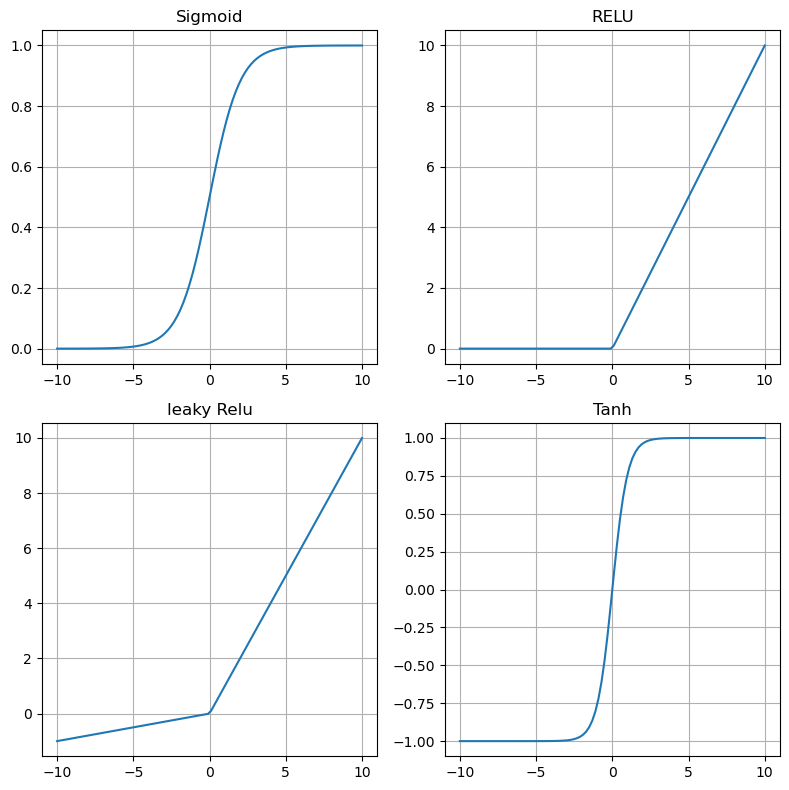

In [37]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

#recitifed linear unit
def relu(x):
    return np.maximum(0,x)

def leaky_relu(x, alpha=0.10):
    return np.where(x>0, x, alpha*x)

def tanh(x):
    return np.tanh(x)

x = np.linspace(-10,10,100)

plt.figure(figsize=(8,8))

plt.subplot(2,2,1)
plt.plot(x,sigmoid(x))
plt.title("Sigmoid")
plt.grid(True)

plt.subplot(2,2,2)
plt.plot(x,relu(x))
plt.title("RELU")
plt.grid(True)

plt.subplot(2,2,3)
plt.plot(x,leaky_relu(x))
plt.title("leaky Relu")
plt.grid(True)

plt.subplot(2,2,4)
plt.plot(x,tanh(x))
plt.title("Tanh")
plt.grid(True)

plt.tight_layout()

In [ ]:
# name | address |ph | pref
# rudra   sjdhjhd 8.    tea
# phani.  chennai. 88.  coffe


# 7:30 - res -> tea -> address -> wake up!    money (cod)
#      plus tip 

# chAI
|
Hours_of_Sleep, cups_of_coffee, travel_time    ||. produciveity score

In [36]:
import pandas as pd

In [37]:
np.random.seed(10)

num_samples = 10000
X = np.random.rand(num_samples,3) * np.array([24,10,60])
Y = np.random.rand(num_samples) * 100

In [38]:
# len(X)

In [39]:
pd.DataFrame(X, columns=["hours_of_sleep","cups_of_coffee","travel_time"]).head(5)

,hours_of_sleep,cups_of_coffee,travel_time
0,18.511695,0.207519,38.018894
1,17.971293,4.985070,13.487799
2,4.753509,7.605307,10.146650
3,2.120156,6.853598,57.203601
4,0.094758,5.121923,48.757258


In [40]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [41]:
def create_custom_model():
    #simple input layer (code)
    inputs = keras.Input(shape=(3,))
    
    #First layer with 2 neurons
    x = layers.Dense(2, activation="sigmoid")(inputs)
    
    #output layer
    outputs = layers.Dense(1, activation='linear')(x)
    
    model = keras.Model(inputs=inputs, outputs=outputs)
    return model

model = create_custom_model()    
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01),
             loss="mean_squared_error")

In [42]:
print(model.summary())

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 3)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 2)              │             8 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11 (44.00 B)

 Trainable params: 11 (44.00 B)

 Non-trainable params: 0 (0.00 B)

None


In [43]:
10000/32  

312.5

In [44]:
# X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.10, random_state=10)

history = model.fit(X, Y , epochs=150, batch_size=32, validation_split=0.20, verbose=1) #no 

Epoch 1/150
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 674us/step - loss: 3317.3792 - val_loss: 2927.3508
Epoch 2/150
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 318us/step - loss: 2722.2310 - val_loss: 2513.2622
Epoch 3/150
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 334us/step - loss: 2395.6909 - val_loss: 2167.3926
Epoch 4/150
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 317us/step - loss: 2080.0491 - val_loss: 1879.4982
Epoch 5/150
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 314us/step - loss: 1800.7172 - val_loss: 1640.5464
Epoch 6/150
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 313us/step - loss: 1587.7440 - val_loss: 1444.0343
Epoch 7/150
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 320us/step - loss: 1382.0209 - val_loss: 1286.1171
Epoch 8/150
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 356us/step - loss: 1228.4597 - val_loss: 1159.9147
Epoch 9/150
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 329us/step - loss: 1120.8563 - val_loss: 1062.8933
Epoch 10/150
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 328us/step - loss: 1019.3719 - val_loss: 988.9672
Epoch 11/150
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 314us

Epoch 65/150
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 311us/step - loss: 834.7026 - val_loss: 830.0441
Epoch 66/150
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 314us/step - loss: 847.8334 - val_loss: 830.0480
Epoch 67/150
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 317us/step - loss: 849.0101 - val_loss: 830.0151
Epoch 68/150
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 311us/step - loss: 838.2020 - val_loss: 829.9260
Epoch 69/150
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 321us/step - loss: 840.5031 - val_loss: 830.0488
Epoch 70/150
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 319us/step - loss: 833.9785 - val_loss: 830.0820
Epoch 71/150
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 320us/step - loss: 836.4590 - val_loss: 830.0724
Epoch 72/150
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 317us/step - loss: 835.7072 - val_loss: 829.9640
Epoch 73/150
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 307us/step - loss: 845.1976 - val_loss: 829.9302
Epoch 74/150
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 312us/step - loss: 852.6177 - val_loss: 829.9186
Epoch 75/150
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 311us/step - lo

250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 366us/step - loss: 833.7231 - val_loss: 829.9205
Epoch 129/150
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 318us/step - loss: 833.6124 - val_loss: 830.1732
Epoch 130/150
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 311us/step - loss: 831.4385 - val_loss: 830.0782
Epoch 131/150
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 309us/step - loss: 834.9394 - val_loss: 830.1946
Epoch 132/150
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 307us/step - loss: 828.9010 - val_loss: 829.9868
Epoch 133/150
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 303us/step - loss: 832.6305 - val_loss: 830.1357
Epoch 134/150
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 323us/step - loss: 834.8975 - val_loss: 830.0623
Epoch 135/150
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 317us/step - loss: 832.1119 - val_loss: 830.2491
Epoch 136/150
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 312us/step - loss: 825.3860 - val_loss: 830.0754
Epoch 137/150
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 315us/step - loss: 828.0730 - val_loss: 830.3292
Epoch 138/150
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 324us/step - loss:

In [46]:
test_loss = model.evaluate(X, Y, verbose=1)
print(f"Test loss : {test_loss}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 231us/step - loss: 836.5817
Test loss : 834.9120483398438


In [ ]:
# pd.DataFrame(X, columns=["hours_of_sleep","cups_of_coffee","travel_time"]).head(5)

In [47]:
sample_data = np.array([[7,3,25]])

prediction = model.predict(sample_data)
print(f"Prediction for 7,3,25 is :{prediction}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Prediction for 7,3,25 is :[[50.366173]]


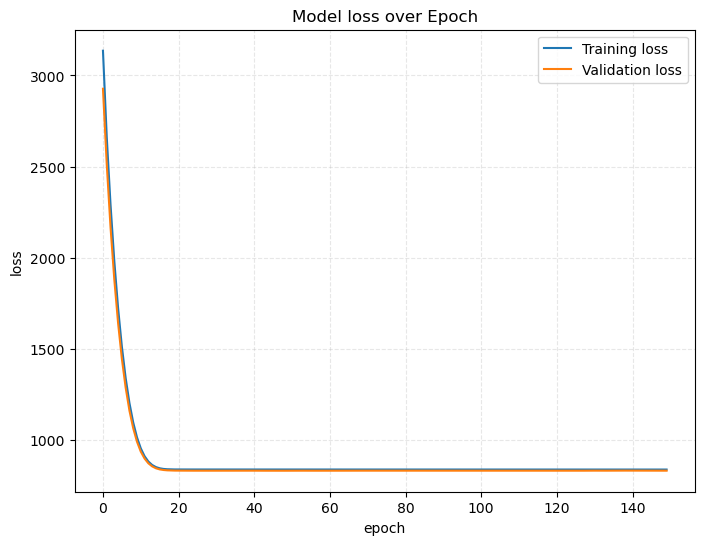

In [48]:
plt.figure(figsize=(8,6))
plt.plot(history.history['loss'],label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title("Model loss over Epoch")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()
plt.grid(True, alpha=0.3,linestyle="--")